$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 2 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [2]:
from pathlib import Path
import pandas as pd
import tarfile

import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [80]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
sns.set_style('darkgrid')
sns.set_palette('viridis')

----------------------------

# `02` Load Data

In [5]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* The data is Clean from NaNs except for one feature only

In [7]:
X = housing.drop(columns=['median_house_value'], axis=1)
y = housing.iloc[:, 8]
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

In [8]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17595    -120.07     36.98                12.0       1790.0           379.0   
6073     -118.22     33.86                16.0       8732.0          1489.0   
6251     -120.94     39.32                14.0       3120.0           595.0   
3161     -122.11     37.68                37.0       1976.0           481.0   
1887     -121.34     38.67                35.0        643.0           117.0   

       population  households  median_income ocean_proximity  
17595      1399.0       397.0         2.5388          INLAND  
6073       3944.0      1493.0         5.1948       <1H OCEAN  
6251       1569.0       556.0         3.5385          INLAND  
3161       1197.0       465.0         2.5772        NEAR BAY  
1887        331.0       134.0         3.0417          INLAND

In [9]:
X_train.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.576297     35.640944           28.629300   2634.395652   
std        2.008301      2.141025           12.622547   2195.367194   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.802500     33.930000           18.000000   1452.750000   
50%     -118.500000     34.260000           29.000000   2128.000000   
75%     -118.010000     37.720000           37.000000   3138.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    16354.000000  16512.000000  16512.000000   16512.000000  
mean       537.400086   1422.226562    499.014595       3.869583  
std        422.272540   1119.964665    383.148507       1.896395  
min          1.000000      3.000000      1.000000       0.499900  
25%        296.000000    786.000000    280.000000       2.562500  
50%        435.000000   1166.000000    410.000000       3.539400  
75%        646.000000   1720.000000    603.000000       4.748350  
max       6445.000000  28566.000000   6082.000000      15.000100

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Note:` Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

<Figure size 500x500 with 0 Axes>

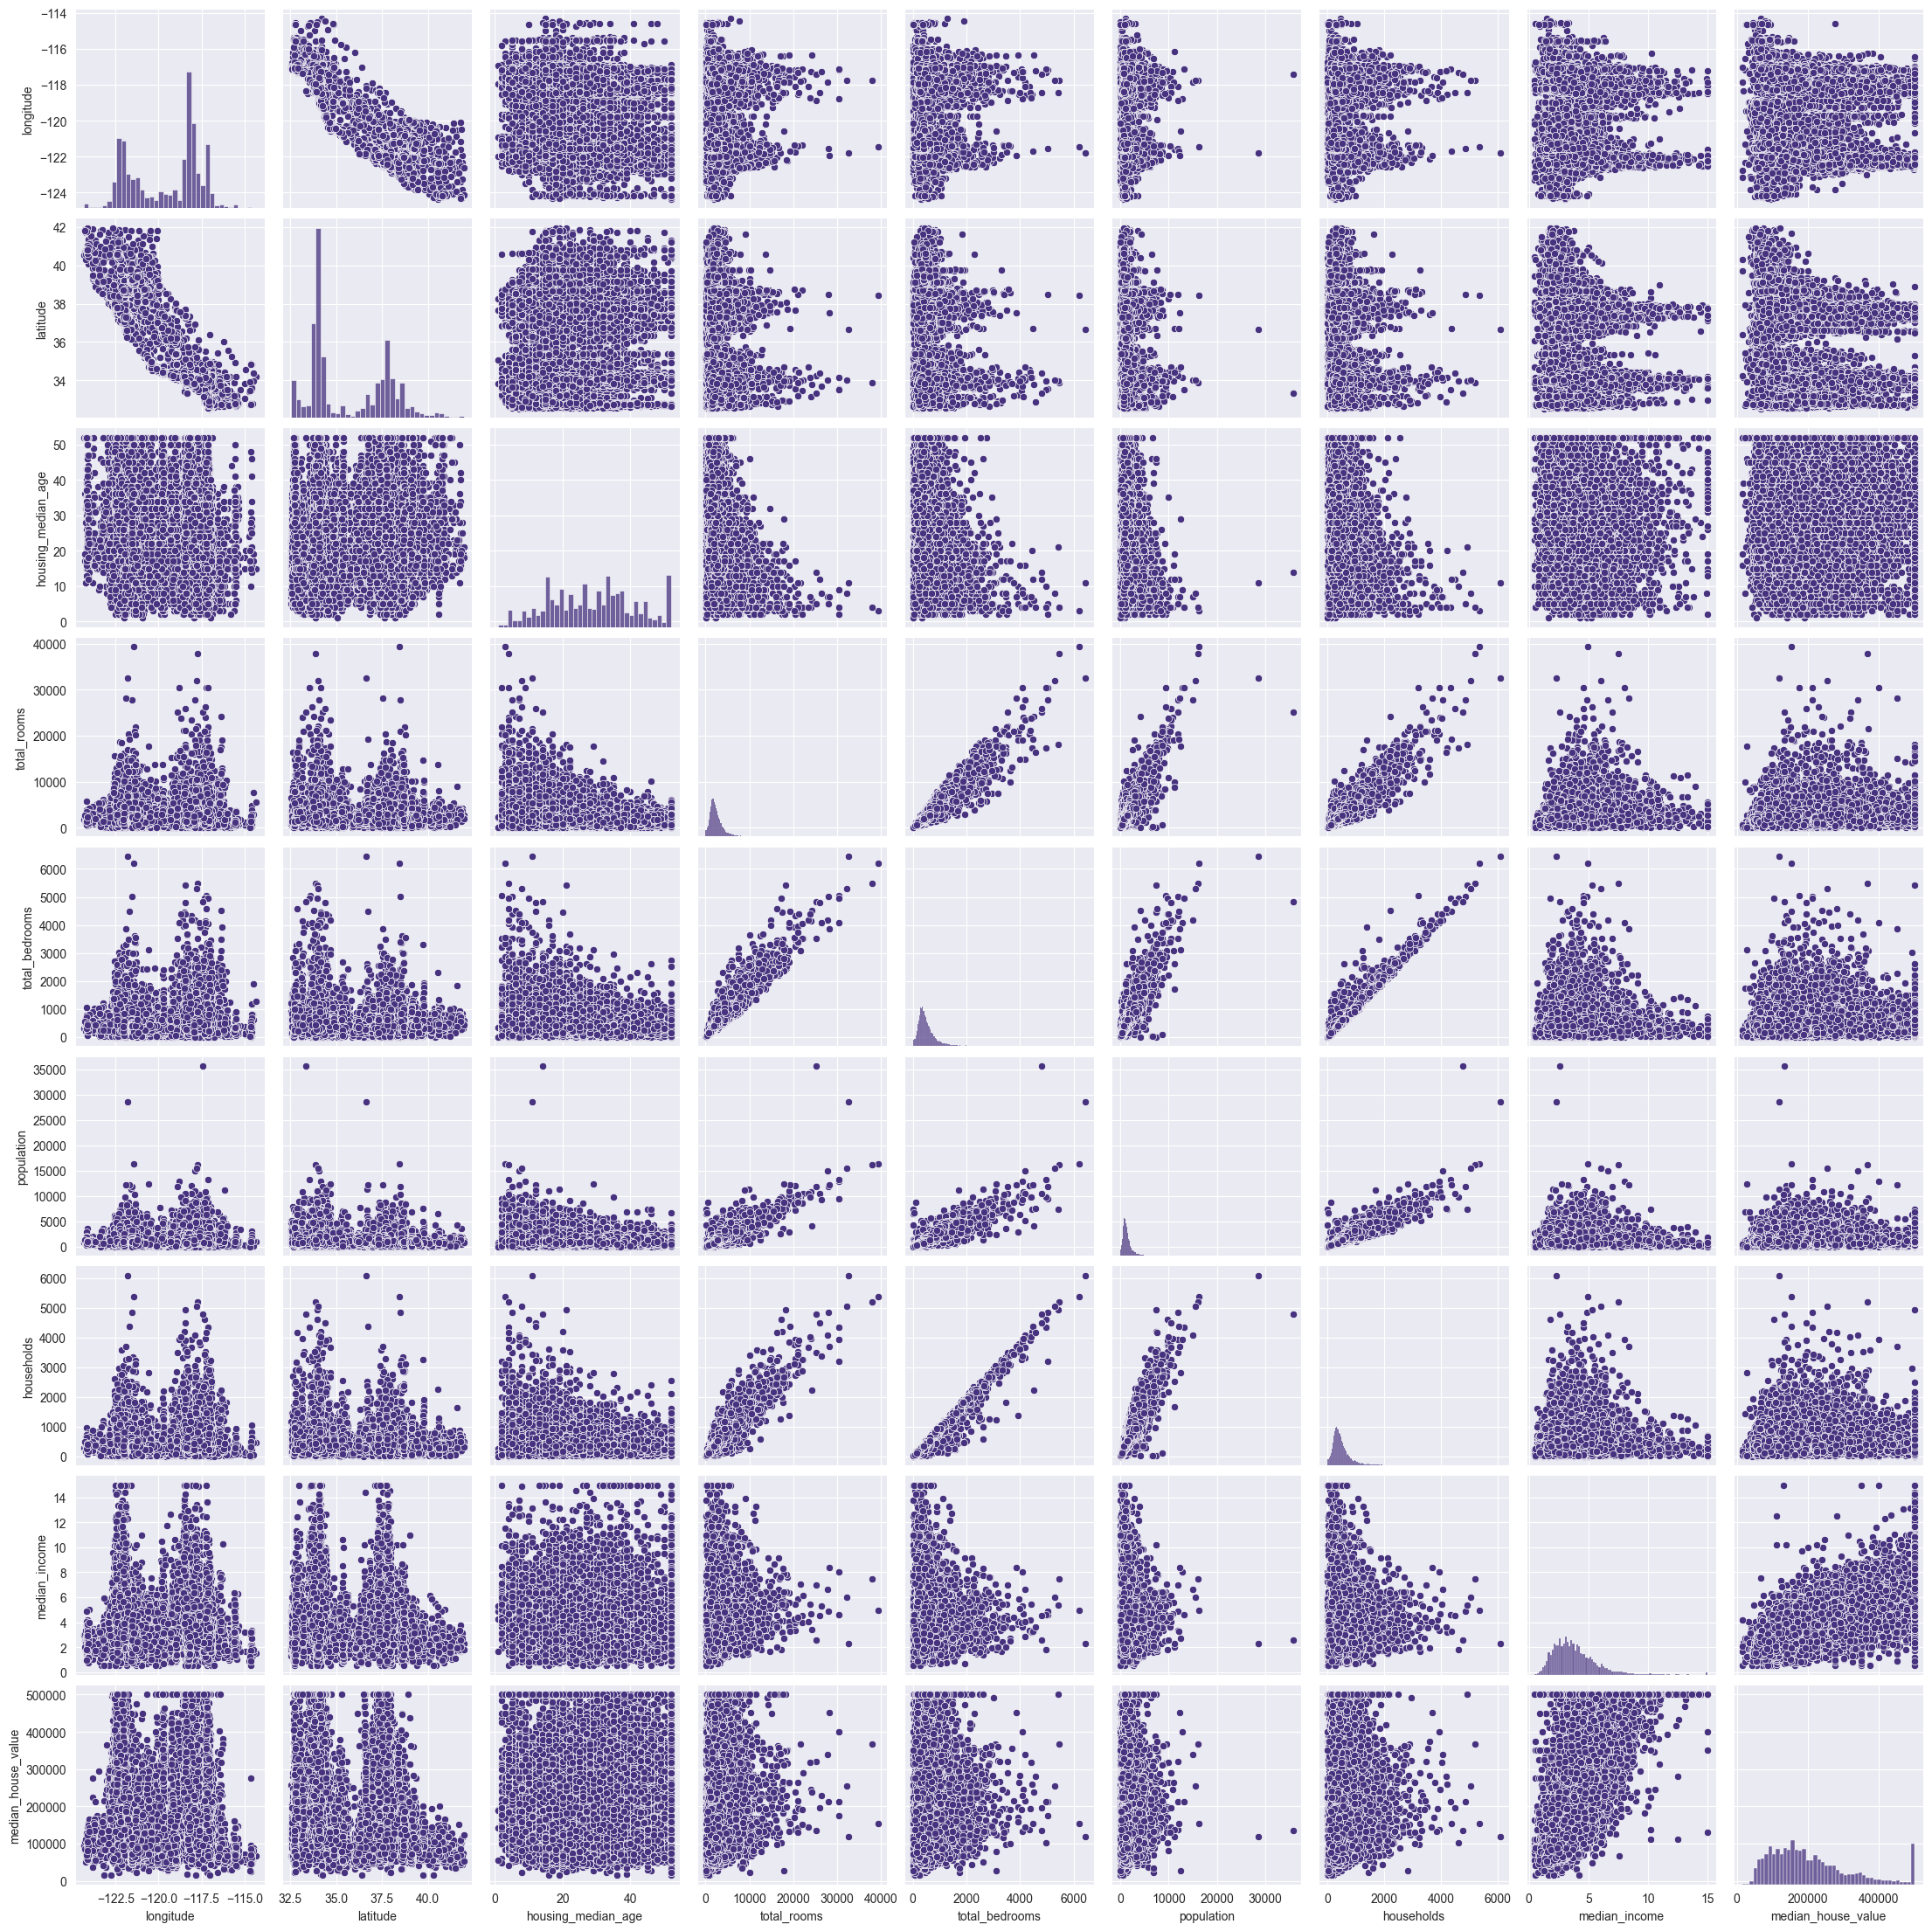

In [10]:
plt.figure(figsize=(5,5))
sns.pairplot(housing)
plt.show()

* As shown in the pair plot there are no features that correlates with the target feature but there is a possibilty for feature selection because there are some features have strong correlations together.

----------------

# `04` Data Preparation

* #### I will start exploring and preprocessing feature by feature

##### 1- longitude

In [11]:
X_train['longitude'].describe()

count    16512.000000
mean      -119.576297
std          2.008301
min       -124.350000
25%       -121.802500
50%       -118.500000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

/var/folders/sc/mn6dzl9d7wlgymnqkz50yrch0000gn/T/ipykernel_23713/3506582430.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=X_train['longitude'], bins=10, palette='viridis', kde=True)


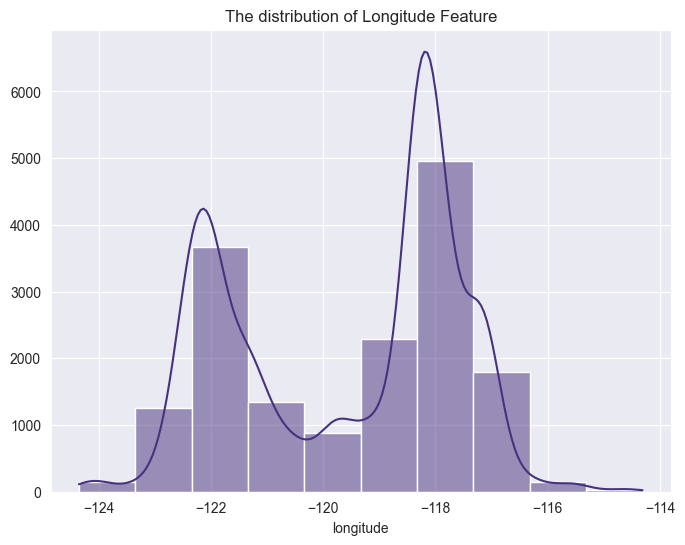

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(x=X_train['longitude'], bins=10, palette='viridis', kde=True)
plt.title("The distribution of Longitude Feature")
plt.ylabel("")
plt.show()

In [13]:
y_train

17595     59600.0
6073     203500.0
6251     157400.0
3161     170200.0
1887     120700.0
           ...   
8222      82800.0
9449     104700.0
8471     279200.0
17048    458500.0
1318     126800.0
Name: median_house_value, Length: 16512, dtype: float64

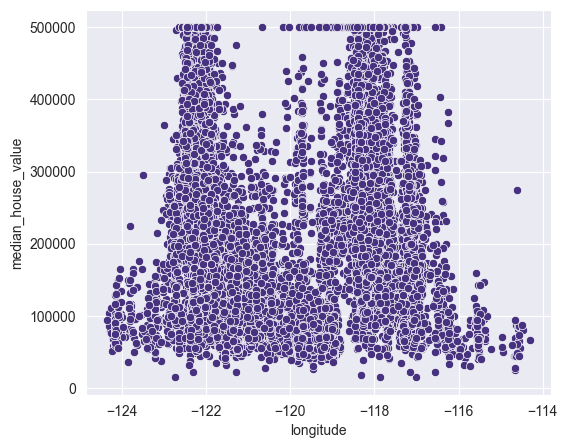

In [14]:
#Check the correlation between the feature and the target feature
#because I am considering the option of droping this column as it does not afford helpful information
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_train['longitude'], y=y_train);


* As shown there is no correlation between the feature and the target and also the feature not informative so I will drop it

In [15]:
X_train.drop(columns=['longitude'], axis=1, inplace=True)
X_test.drop(columns=['longitude'], axis=1, inplace=True)


##### 2- Latitude

In [16]:
X_train['latitude'].describe()

count    16512.000000
mean        35.640944
std          2.141025
min         32.540000
25%         33.930000
50%         34.260000
75%         37.720000
max         41.950000
Name: latitude, dtype: float64

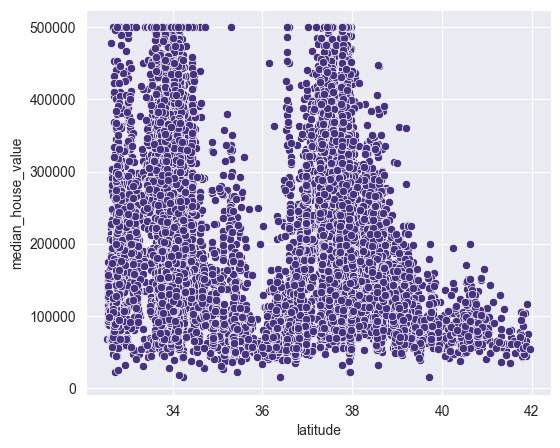

In [17]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_train['latitude'], y=y_train);

* The feature has a similar case to the Longitude, so I will drop it

In [18]:
X_train.drop(columns=['latitude'], axis=1, inplace=True)
X_test.drop(columns=['latitude'], axis=1, inplace=True)


##### 3- housing_median_age

In [19]:
X_train['housing_median_age'].describe()

count    16512.000000
mean        28.629300
std         12.622547
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

/var/folders/sc/mn6dzl9d7wlgymnqkz50yrch0000gn/T/ipykernel_23713/4057837243.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=X_train['housing_median_age'], bins=10, palette='viridis', kde=True)


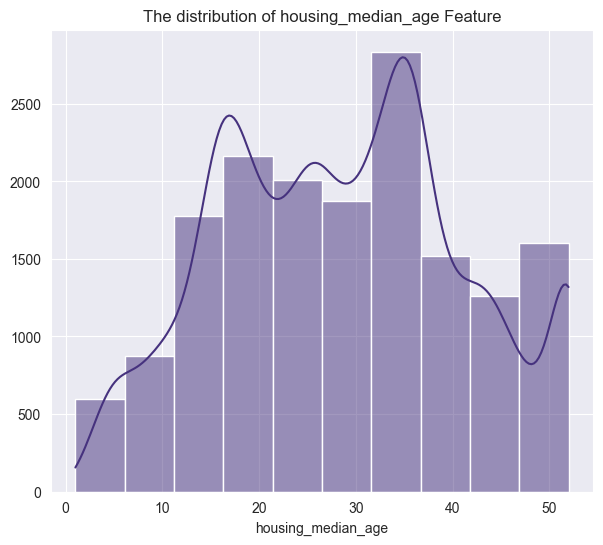

In [20]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['housing_median_age'], bins=10, palette='viridis', kde=True)
plt.title("The distribution of housing_median_age Feature")
plt.ylabel("")
plt.show()

* As shown it is normally distributed

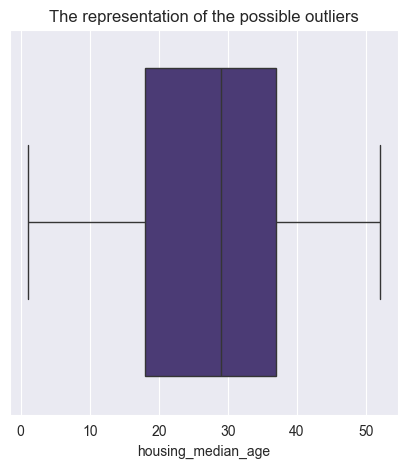

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x=X_train['housing_median_age'])
plt.title("The representation of the possible outliers")
plt.show()

* There are no outliers so we will only scale this feature

##### 4- total_rooms

In [22]:
X_train['total_rooms'].describe()

count    16512.000000
mean      2634.395652
std       2195.367194
min          2.000000
25%       1452.750000
50%       2128.000000
75%       3138.250000
max      39320.000000
Name: total_rooms, dtype: float64

In [23]:
X_train['total_rooms'].skew()

4.2736170532938536

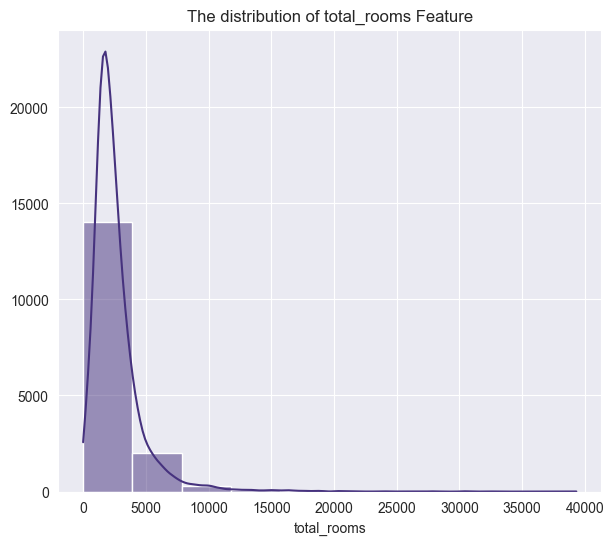

In [24]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['total_rooms'], bins=10, kde=True)
plt.title("The distribution of total_rooms Feature")
plt.ylabel("")
plt.show()

* The feature is strongly right skewed

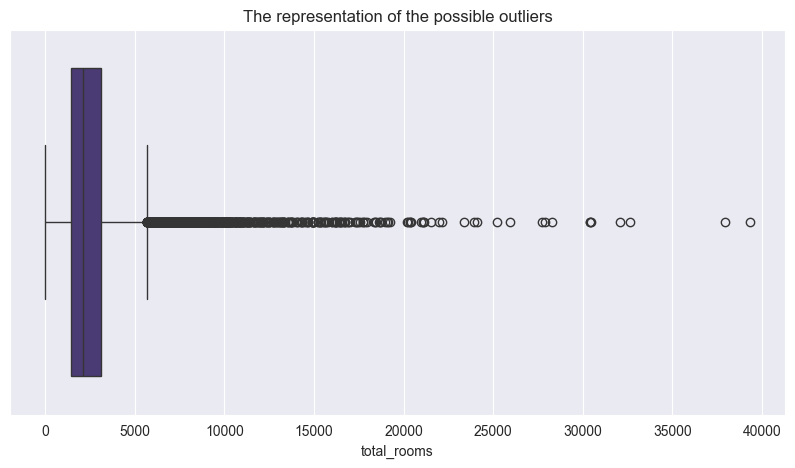

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['total_rooms'])
plt.title("The representation of the possible outliers")
plt.show()

* There are a lot of outliers we need to choose a threshold to filter on it
* We can check how many rows will be deleted according to each threshold[95, 85, 75]

In [26]:
perc_95 = np.percentile(X_train['total_rooms'], 95)
print(f'95th Percentile Value: {perc_95}')
outliers = (X_train['total_rooms']>perc_95).sum()
print(f'Number of Potential Outliers: {outliers}')
print(f"The max value is {np.max(X_train['total_rooms'])}")

95th Percentile Value: 6184.899999999998
Number of Potential Outliers: 826
The max value is 39320.0


* The max value is too higher than the 95th percentile So, I will drop from this threshold

In [27]:
# Do Not Forget to drop the same rows from the y_train before dropping from X_train; to keep the same diminsionality 
y_train.drop(y_train[X_train[X_train['total_rooms']>perc_95].index].index, axis=0, inplace=True)
X_train.drop(X_train[X_train['total_rooms']>perc_95].index, axis=0, inplace=True)
print(X_train.shape, y_train.shape)


(15686, 7) (15686,)


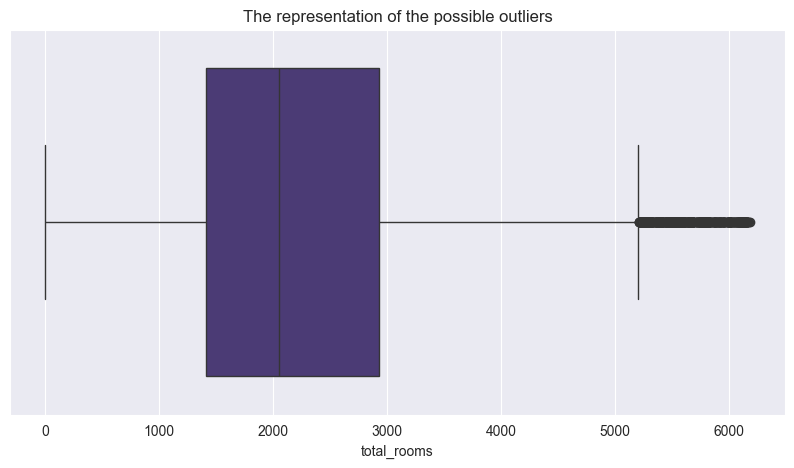

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['total_rooms'])
plt.title("The representation of the possible outliers")
plt.show()

* Now as shown the box plot became better with less outliers

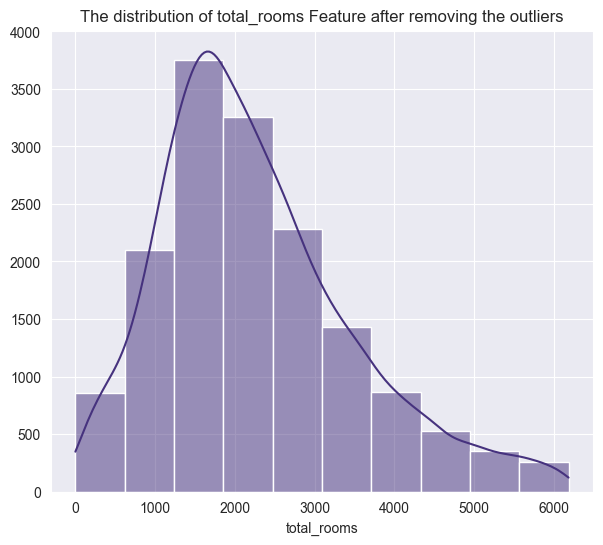

In [29]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['total_rooms'], bins=10, kde=True)
plt.title("The distribution of total_rooms Feature after removing the outliers")
plt.ylabel("")
plt.show()

* It now has better distribution

##### 5- total_bedrooms

In [30]:
X_train['total_bedrooms'].describe()

count    15535.000000
mean       472.747023
std        267.788829
min          1.000000
25%        290.000000
50%        420.000000
75%        604.000000
max       2747.000000
Name: total_bedrooms, dtype: float64

In [31]:
X_train['total_bedrooms'].isna().sum()


151

In [32]:
np.percentile(X_train['total_bedrooms'],50)

nan

In [33]:
# fill the nans with the median as it doesn't get affected by the outliers
median= X_train['total_bedrooms'].describe()['50%']
X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(median)
X_train['total_bedrooms'].isna().sum()


0

In [34]:
# fill the nans also for the X_test
median= X_test['total_bedrooms'].describe()['50%']
X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna(median)
X_test['total_bedrooms'].isna().sum()

0

In [35]:
X_train['total_bedrooms'].skew()


1.330483942709528

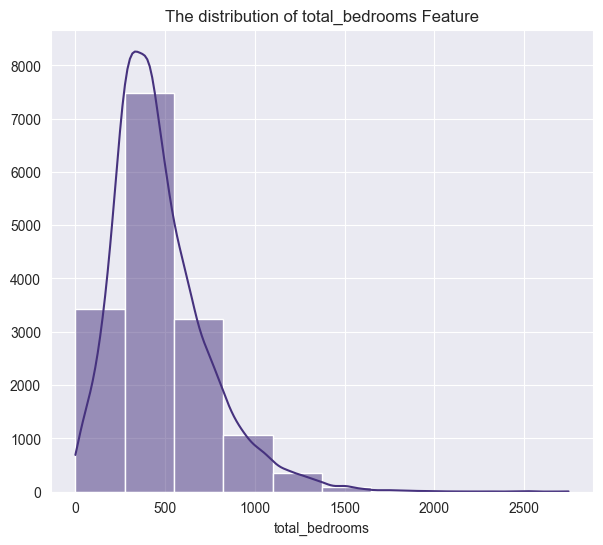

In [36]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['total_bedrooms'], bins=10, kde=True)
plt.title("The distribution of total_bedrooms Feature")
plt.ylabel("")
plt.show()

* The feature is right skewed and contains outliers so lets plot them

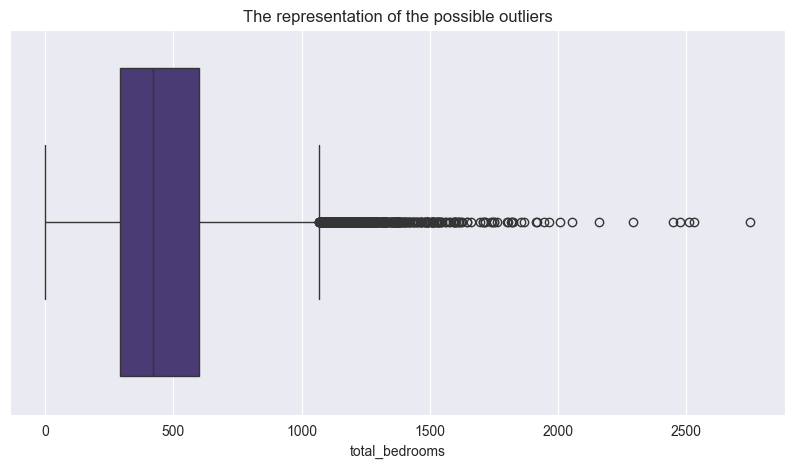

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['total_bedrooms'])
plt.title("The representation of the possible outliers")
plt.show()

In [38]:
perc_95 = np.percentile(X_train['total_bedrooms'], 95)
print(f'95th Percentile Value: {perc_95}')
outliers = (X_train['total_bedrooms']>perc_95).sum()
print(f'Number of Potential Outliers: {outliers}')
print(f"The max value is {np.max(X_train['total_bedrooms'])}")

95th Percentile Value: 984.0
Number of Potential Outliers: 782
The max value is 2747.0


* Will drop on the 95% percentile

In [39]:
# Do Not Forget to drop the same rows from the y_train before dropping from X_train; to keep the same diminsionality 
y_train.drop(y_train[X_train[X_train['total_bedrooms']>perc_95].index].index, axis=0, inplace=True)
X_train.drop(X_train[X_train['total_bedrooms']>perc_95].index, axis=0, inplace=True)
print(X_train.shape, y_train.shape)


(14904, 7) (14904,)


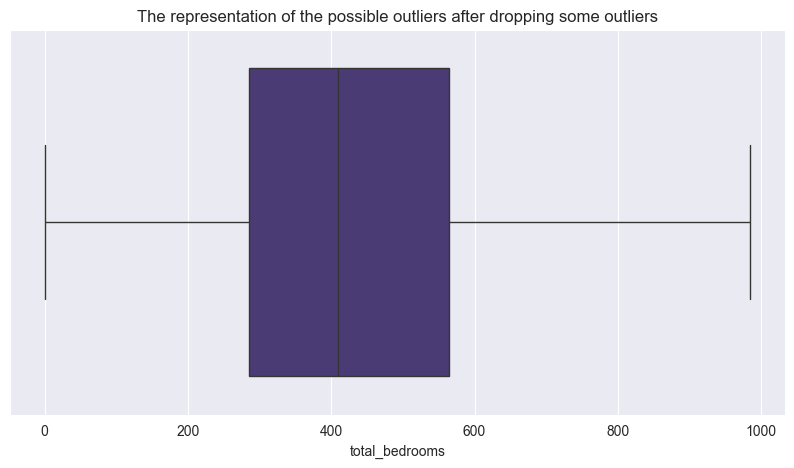

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['total_bedrooms'])
plt.title("The representation of the possible outliers after dropping some outliers")
plt.show()

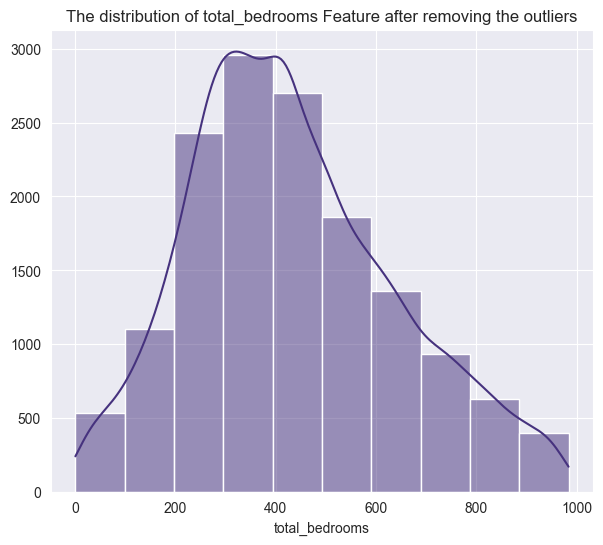

In [41]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['total_bedrooms'], bins=10, kde=True)
plt.title("The distribution of total_bedrooms Feature after removing the outliers")
plt.ylabel("")
plt.show()

* As shown in both plots, the distribution became better with existance of outliers

##### 6- population

In [42]:
X_train['population'].describe()

count    14904.000000
mean      1184.858159
std        629.782270
min          3.000000
25%        751.000000
50%       1090.000000
75%       1526.000000
max       8733.000000
Name: population, dtype: float64

In [43]:
X_train['population'].skew()

1.1401256202627499

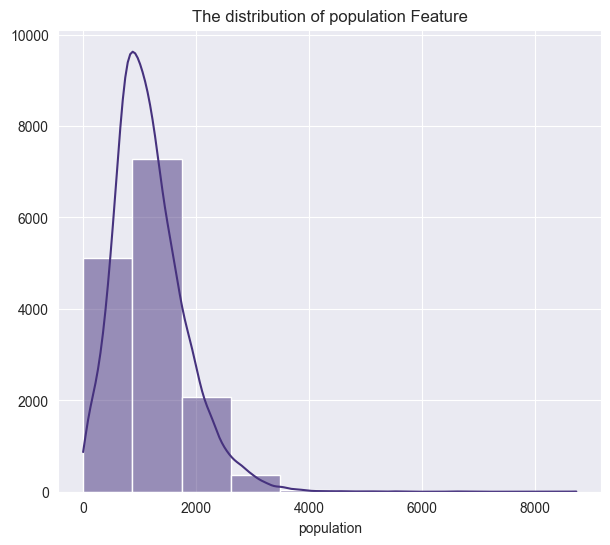

In [44]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['population'], bins=10, kde=True)
plt.title("The distribution of population Feature")
plt.ylabel("")
plt.show()

* The feature is right skewed, lets check the outliers

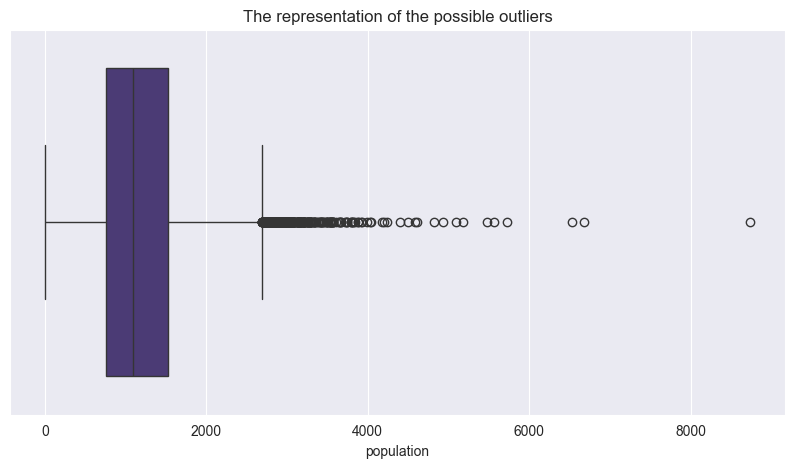

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['population'])
plt.title("The representation of the possible outliers")
plt.show()

In [46]:
perc_95 = np.percentile(X_train['population'], 95)
print(f'95th Percentile Value: {perc_95}')
outliers = (X_train['population']>perc_95).sum()
print(f'Number of Potential Outliers: {outliers}')
print(f"The max value is {np.max(X_train['population'])}")

95th Percentile Value: 2330.0
Number of Potential Outliers: 745
The max value is 8733.0


* Will drop on the 95% percentile

In [47]:
# Do Not Forget to drop the same rows from the y_train before dropping from X_train; to keep the same diminsionality 
y_train.drop(y_train[X_train[X_train['population']>perc_95].index].index, axis=0, inplace=True)
X_train.drop(X_train[X_train['population']>perc_95].index, axis=0, inplace=True)
print(X_train.shape, y_train.shape)


(14159, 7) (14159,)


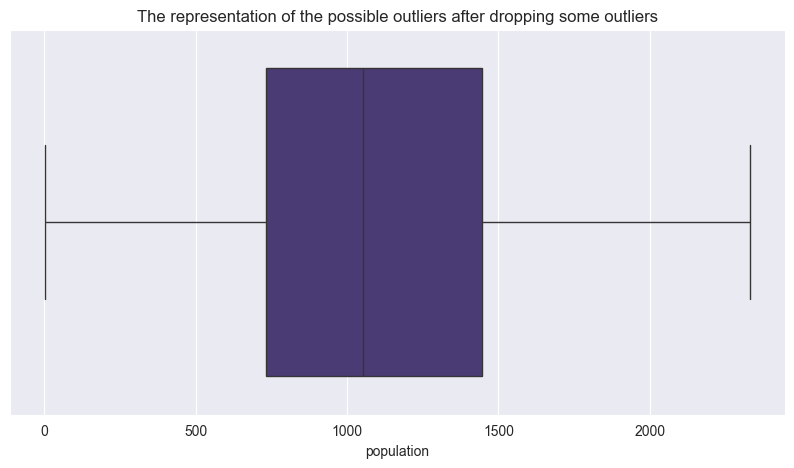

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['population'])
plt.title("The representation of the possible outliers after dropping some outliers")
plt.show()

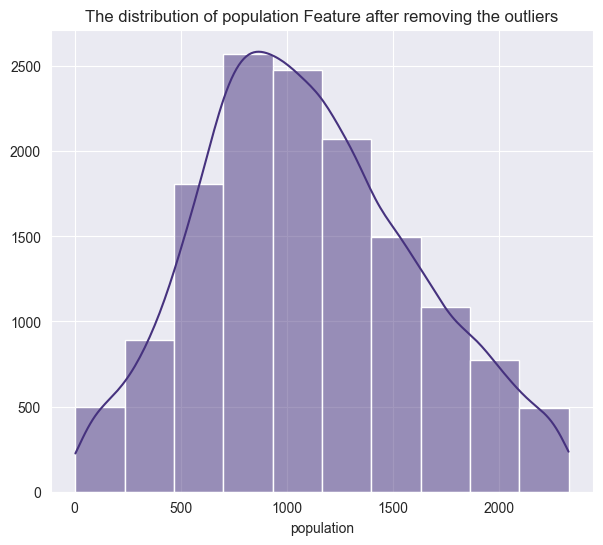

In [49]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['population'], bins=10, kde=True)
plt.title("The distribution of population Feature after removing the outliers")
plt.ylabel("")
plt.show()

* The feature became normally distributed without outliers

##### 7- households

In [50]:
X_train['households'].describe()

count    14159.000000
mean       390.200085
std        181.331519
min          1.000000
25%        264.000000
50%        373.000000
75%        505.000000
max       1093.000000
Name: households, dtype: float64

In [51]:
X_train['households'].skew()

0.3812832237853368

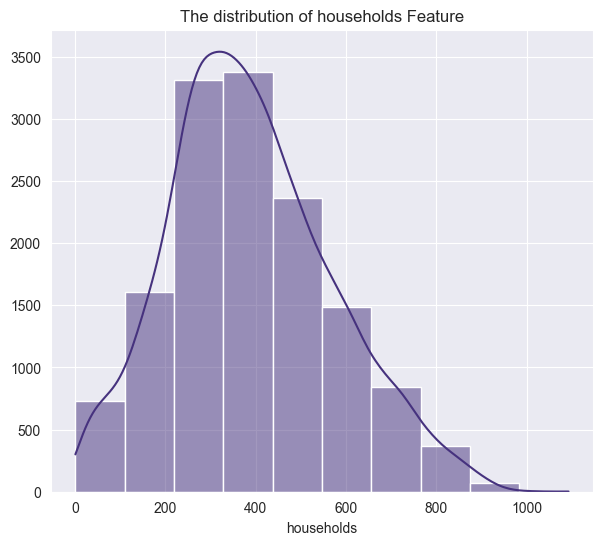

In [52]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['households'], bins=10, kde=True)
plt.title("The distribution of households Feature")
plt.ylabel("")
plt.show()

* The feature is slightly normally distributed

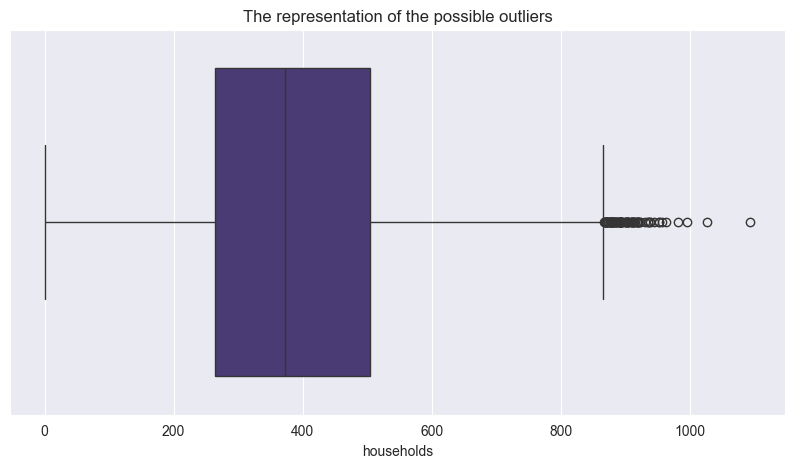

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['households'])
plt.title("The representation of the possible outliers")
plt.show()

In [54]:
perc_90 = np.percentile(X_train['households'], 90)
print(f'95th Percentile Value: {perc_90}')
outliers = (X_train['households']>perc_90).sum()
print(f'Number of Potential Outliers: {outliers}')
print(f"The max value is {np.max(X_train['households'])}")

95th Percentile Value: 643.0
Number of Potential Outliers: 1407
The max value is 1093.0


* As the difference between the 90% percentile and max value is way greater than the 95% so will drop on it

In [55]:
# Do Not Forget to drop the same rows from the y_train before dropping from X_train; to keep the same diminsionality 
y_train.drop(y_train[X_train[X_train['households']>perc_90].index].index, axis=0, inplace=True)
X_train.drop(X_train[X_train['households']>perc_90].index, axis=0, inplace=True)
print(X_train.shape, y_train.shape)


(12752, 7) (12752,)


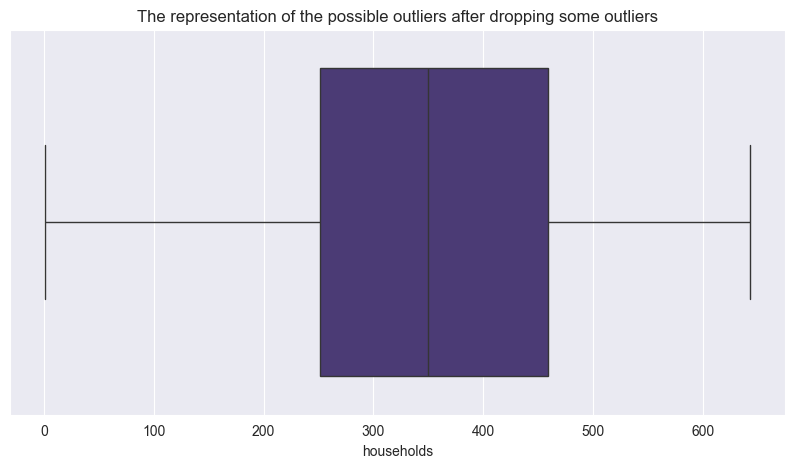

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['households'])
plt.title("The representation of the possible outliers after dropping some outliers")
plt.show()

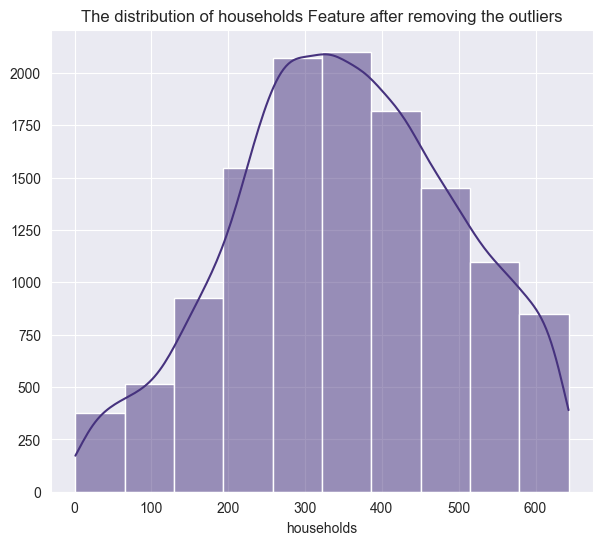

In [57]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['households'], bins=10, kde=True)
plt.title("The distribution of households Feature after removing the outliers")
plt.ylabel("")
plt.show()

* The feature became normally distributed without outliers

##### 8- median_income

In [58]:
X_train['median_income'].describe()

count    12752.000000
mean         3.884047
std          1.959283
min          0.499900
25%          2.522050
50%          3.549600
75%          4.798950
max         15.000100
Name: median_income, dtype: float64

In [59]:
X_train['median_income'].skew()


1.614991638258998

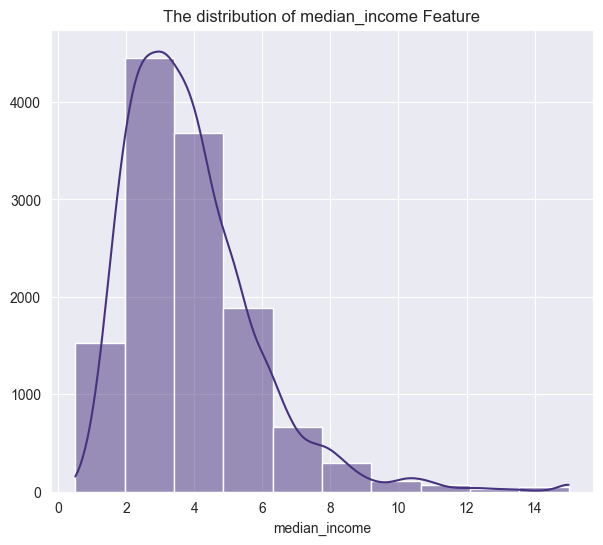

In [60]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['median_income'], bins=10, kde=True)
plt.title("The distribution of median_income Feature")
plt.ylabel("")
plt.show()

* The feature also right skewed

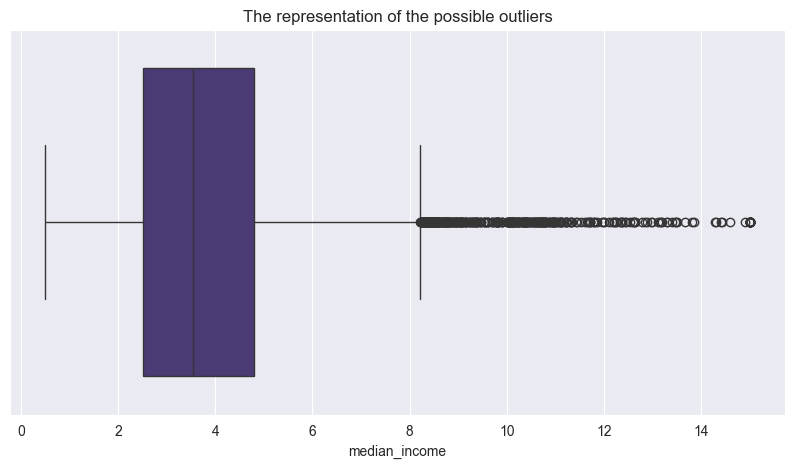

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['median_income'])
plt.title("The representation of the possible outliers")
plt.show()

In [62]:
perc_90 = np.percentile(X_train['median_income'], 90)
print(f'95th Percentile Value: {perc_90}')
outliers = (X_train['median_income']>perc_90).sum()
print(f'Number of Potential Outliers: {outliers}')
print(f"The max value is {np.max(X_train['median_income'])}")

95th Percentile Value: 6.23053
Number of Potential Outliers: 1276
The max value is 15.0001


In [63]:
# Do Not Forget to drop the same rows from the y_train before dropping from X_train; to keep the same diminsionality 
y_train.drop(y_train[X_train[X_train['median_income']>perc_90].index].index, axis=0, inplace=True)
X_train.drop(X_train[X_train['median_income']>perc_90].index, axis=0, inplace=True)
print(X_train.shape, y_train.shape)


(11476, 7) (11476,)


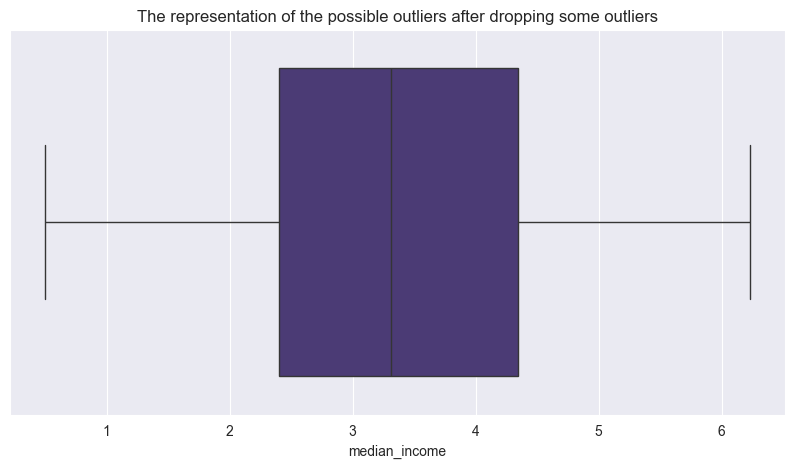

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(x=X_train['median_income'])
plt.title("The representation of the possible outliers after dropping some outliers")
plt.show()

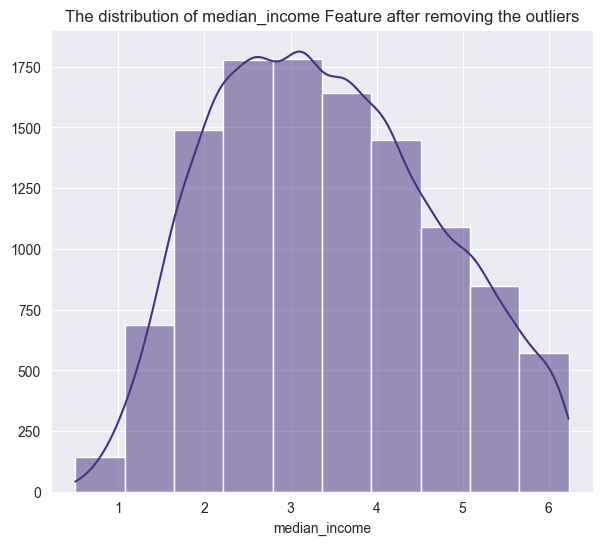

In [65]:
plt.figure(figsize=(7,6))
sns.histplot(x=X_train['median_income'], bins=10, kde=True)
plt.title("The distribution of median_income Feature after removing the outliers")
plt.ylabel("")
plt.show()

* The feature became normally distributed without outliers

##### 9- ocean_proximity

In [66]:
X_train['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     4746
INLAND        4007
NEAR OCEAN    1470
NEAR BAY      1249
ISLAND           4
Name: count, dtype: int64

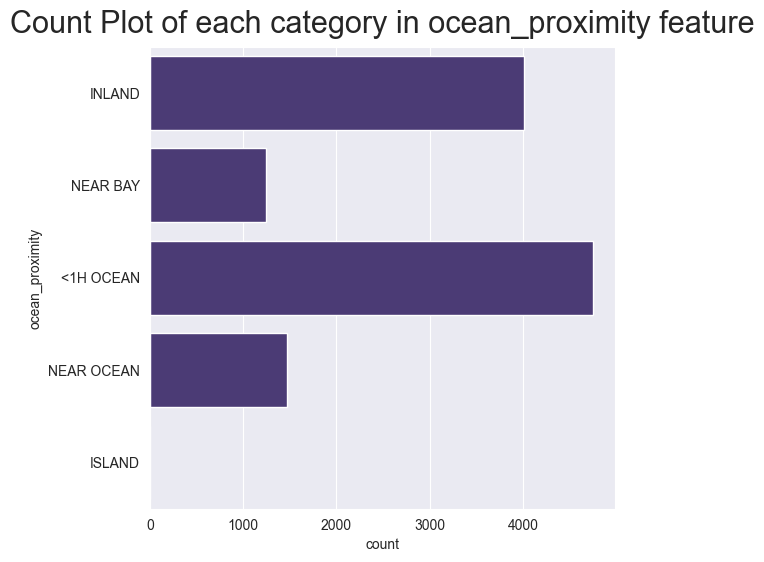

In [67]:
plt.figure(figsize=(6,6))
sns.countplot(X_train['ocean_proximity'])
plt.title("Count Plot of each category in ocean_proximity feature",fontsize=22, pad=10)
plt.show()

* Plotting the target feature with respect to this categorical feature

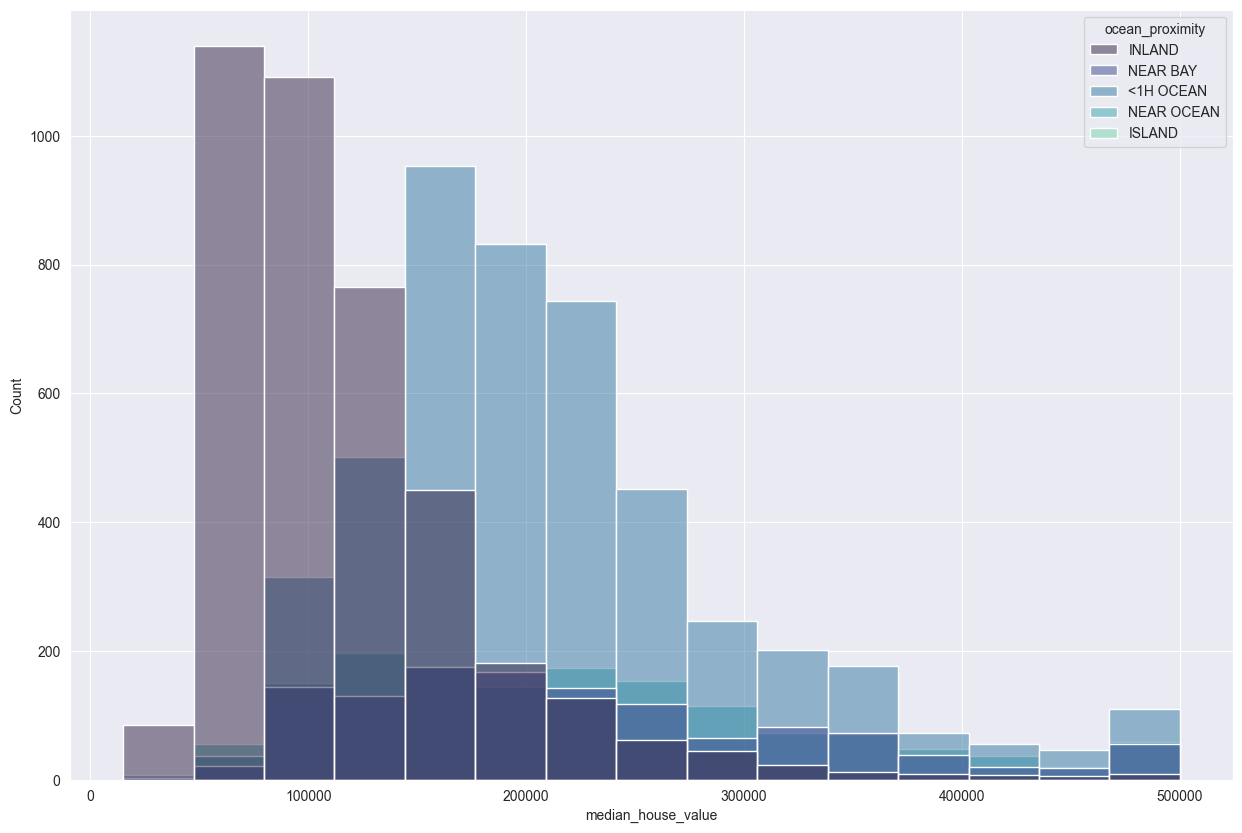

In [68]:
plt.figure(figsize=(15,10))
sns.histplot(x=y_train, bins=15, hue=X_train['ocean_proximity'], palette='mako');

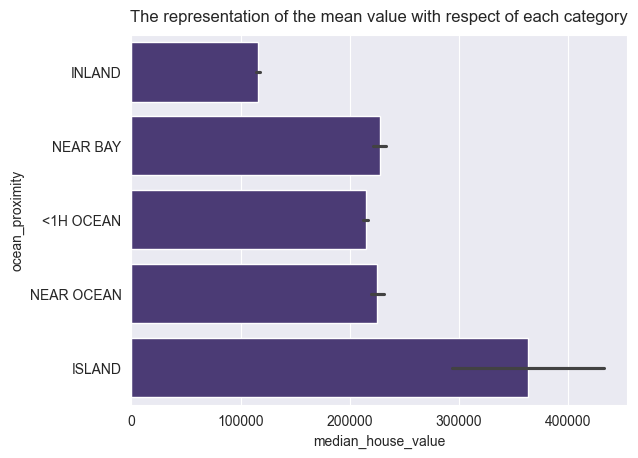

In [69]:
sns.barplot(x=y_train,  y=X_train['ocean_proximity'])
plt.title("The representation of the mean value with respect of each category", pad=10)
plt.show()

* From these 2 plots: this means that as there is a relation between each category and its corresponding value
* The 'ISLAND' category its mean value is the highest while 'INLAND' is the lowest which totally makes sense.

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

#### Features Scaling for numerical features using standard scaler

In [70]:
X_train_numerical = X_train.select_dtypes(include=('number')).columns
X_train_numerical

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')

In [71]:
scaler = StandardScaler()
X_train[X_train_numerical] = scaler.fit_transform(X_train[X_train_numerical])
X_test[X_train_numerical]= scaler.transform(X_test[X_train_numerical])

#### Apply Ordinal Encoder to the Object Feature

In [72]:
label_encoder = LabelEncoder()
X_train['ocean_proximity'] = label_encoder.fit_transform(X_train['ocean_proximity'])
X_train

housing_median_age  total_rooms  total_bedrooms  population  \
17595           -1.547830    -0.035030       -0.001130    0.820277   
6251            -1.383528     1.592956        1.371317    1.191784   
3161             0.505940     0.192644        0.646970    0.378839   
1887             0.341639    -1.439014       -1.665858   -1.513662   
151             -0.151266    -1.137898       -1.354515   -0.932363   
...                   ...          ...             ...         ...   
1182            -0.808472    -1.252959       -1.373577   -1.332279   
8222             1.409599    -0.584628       -0.890679   -0.770648   
9449            -0.644171     0.602700        0.685093   -0.010151   
8471             1.327448    -0.301872        0.240319   -0.510593   
1318             0.177337    -0.046046       -0.337888   -0.241796   

       households  median_income  ocean_proximity  
17595    0.305117      -0.687003                1  
6251     1.402948       0.097304                1  
3161     0.774630      -0.656876                3  
1887    -1.510794      -0.292456                1  
151     -1.310561       1.213238                0  
...           ...            ...              ...  
1182    -1.317465       0.301756                0  
8222    -0.999853      -0.488592                1  
9449     0.215357      -0.907773                1  
8471     0.215357      -0.605332                0  
1318    -0.267966       0.456468                1  

[11476 rows x 7 columns]

In [73]:
X_test['ocean_proximity'] = label_encoder.fit_transform(X_test['ocean_proximity'])
X_test

housing_median_age  total_rooms  total_bedrooms  population  \
15712           -1.876433    29.993356       23.463902   18.217740   
4119            -1.547830     3.884377        0.329274    2.365310   
15725           -1.547830     0.442350        0.278443    0.101301   
14616           -0.972774    -0.208845       -0.071023   -1.019776   
13238            0.670242     0.315049        0.653324    1.561106   
...                   ...          ...             ...         ...   
13521            0.259488     1.229414        0.767694    0.885837   
16913            0.916694    -0.849023       -0.674646   -0.890841   
20069           -1.137076     1.715361        2.140142    0.780941   
446             -0.151266     4.689802        2.781888    2.347827   
2209            -1.219226    -0.595644       -1.163898   -0.838393   

       households  median_income  ocean_proximity  
15712   20.770360       1.497948                0  
4119     3.094576       2.191562                0  
15725    0.167024      -0.437989                1  
14616    0.008219      -1.269055                1  
13238    0.636538      -0.171558                4  
...           ...            ...              ...  
13521    0.898912       1.636184                0  
16913   -0.654623       0.205571                0  
20069    2.625063      -0.406921                0  
446      3.177431       2.364632                0  
2209    -1.103422       2.046186                0  

[4128 rows x 7 columns]

----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [74]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **MSE**, **MAE**, $R^2$. etc.

In [75]:
print(f"Train Accuracy:{lr.score(X_train,y_train)}")
print(f"Test Accuracy:{lr.score(X_test,y_test)}")

y_pred = lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Train Accuracy:0.4760342012963653
Test Accuracy:0.37263588815243076
Mean Squared Error: 8220298576.237945
Mean Absolute Error: 60902.36604540316
R2 Score: 0.37263588815243076


----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [78]:
sgd = SGDRegressor(max_iter=2000, random_state=42, learning_rate='adaptive', eta0=0.001)
sgd.fit(X_train,y_train)

SGDRegressor(eta0=0.001, learning_rate='adaptive', max_iter=2000,
             random_state=42)

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **MSE**, **MAE**, $R^2$. etc.

In [79]:
print(f"Train Accuracy:{sgd.score(X_train,y_train)}")
print(f"Test Accuracy:{sgd.score(X_test,y_test)}")

y_pred = sgd.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Train Accuracy:0.47603403708144
Test Accuracy:0.3731977352213809
Mean Squared Error: 8212936741.9000635
Mean Absolute Error: 60885.37825347386
R2 Score: 0.3731977352213809


## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [105]:
param_grid = {'kernel':['linear','poly','rbf'],
              'C':[0.1, 1, 10, 20, 40, 70, 100]}
svr = SVR()

In [106]:
grid_search = GridSearchCV(svr, param_grid=param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 20, 40, 70, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [107]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 100, 'kernel': 'linear'}


In [108]:
# Now fit the model with its new best params
svr = SVR(kernel='linear', C= 100)
svr.fit(X_train, y_train)


SVR(C=100, kernel='linear')

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [109]:
y_pred = svr.predict(X_test)
print("Train Accuracy:",svr.score(X_train, y_train))
print("Test Accuracy:",svr.score(X_test, y_test))
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Train Accuracy: 0.42646573849325176
Test Accuracy: 0.5242950085067293
Mean Squared Error: 6233122026.641423
Mean Absolute Error: 55716.76260428377
R2 Score: 0.5242950085067293


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$